In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('CUSTOMER_TRANSACTION.csv')

In [25]:
df.head(5)

,Customer_ID,Timestamp,Amount,Transaction_Type,Gender,Age,Profession_Code,Work_Experience,Family_Size,Annual_Median,Occupation_Name
0,7628,2023-09-28 01:32:00,67839.273760,Deposit,Male,29,33-3012,5,4,49610,Correctional Officers and Jailers
1,9403,2023-12-30 17:25:00,665.673802,Withdrawal,Female,18,41-2030,1,2,30600,Retail Salespersons
2,4153,2023-10-24 17:58:00,38819.638980,Deposit,Male,40,13-2080,10,5,51830,"Tax Examiners, Collectors and Preparers, and R..."
3,8449,2024-02-11 01:05:00,27712.229710,Deposit,Female,20,37-2011,3,2,31990,"Janitors and Cleaners, Except Maids and Housek..."
4,1320,2024-01-12 11:40:00,1738.976438,Withdrawal,Female,30,53-3030,6,3,46300,Driver/Sales Workers and Truck Drivers


In [26]:
df.columns

Index(['Customer_ID', 'Timestamp', 'Amount', 'Transaction_Type', 'Gender',
       'Age', 'Profession_Code', 'Work_Experience', 'Family_Size',
       'Annual_Median', 'Occupation_Name'],
      dtype='object')

In [27]:
df.shape

(99949, 11)

In [28]:
# Exploratory data analysis

In [29]:
df.describe()

,Customer_ID,Amount,Age,Work_Experience,Family_Size,Annual_Median
count,99949.000000,99949.000000,99949.000000,99949.000000,99949.000000,99949.000000
mean,6004.420114,11452.000782,30.866702,6.225535,3.236541,54689.143863
std,2888.142463,16719.469585,9.055983,5.052526,1.267293,27458.715163
min,1000.000000,5.204105,18.000000,1.000000,1.000000,27270.000000
25%,3504.000000,777.243684,23.000000,2.000000,2.000000,35290.000000
50%,6015.000000,3197.907379,29.000000,5.000000,3.000000,44980.000000
75%,8506.000000,17631.572040,38.000000,9.000000,4.000000,67620.000000
max,10999.000000,227097.575800,65.000000,23.000000,8.000000,227180.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99949 entries, 0 to 99948
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       99949 non-null  int64  
 1   Timestamp         99949 non-null  object 
 2   Amount            99949 non-null  float64
 3   Transaction_Type  99949 non-null  object 
 4   Gender            99949 non-null  object 
 5   Age               99949 non-null  int64  
 6   Profession_Code   99949 non-null  object 
 7   Work_Experience   99949 non-null  int64  
 8   Family_Size       99949 non-null  int64  
 9   Annual_Median     99949 non-null  int64  
 10  Occupation_Name   99949 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB


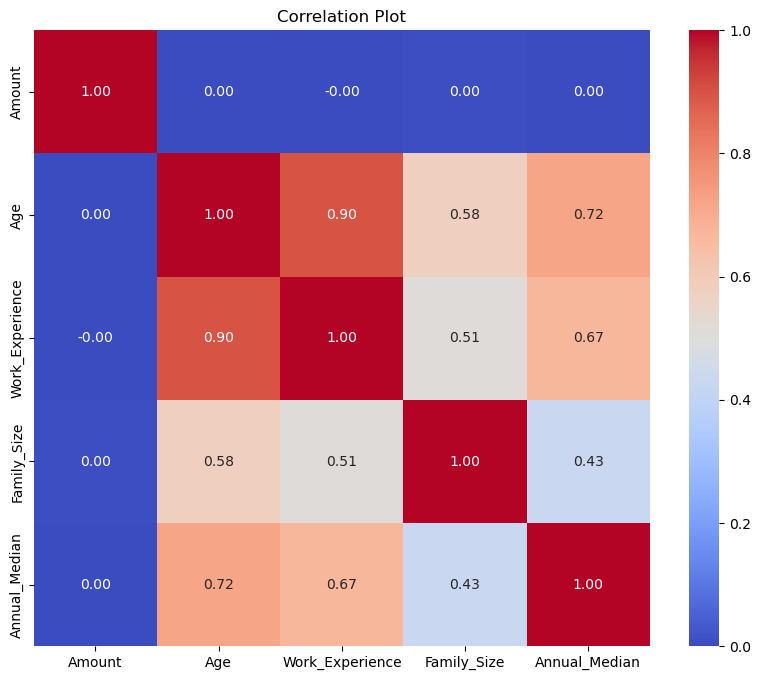

In [31]:

# Selecting the columns for correlation calculation
columns_for_correlation = ['Amount', 'Age', 'Work_Experience', 'Family_Size', 'Annual_Median']

# Compute the correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Create a correlation plot using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Plot')
plt.show()

From this Correlation plot we can check which all parameters are related to each other.
Key Obervations:
1. Age and Work_Experience are highly correlated.
2. Age is correlated to annual_median salary
3. This correlation plot says that the amount column is not correlated to any of the other columns.To understand the behaviour of amount and transaction type we do the below analysis

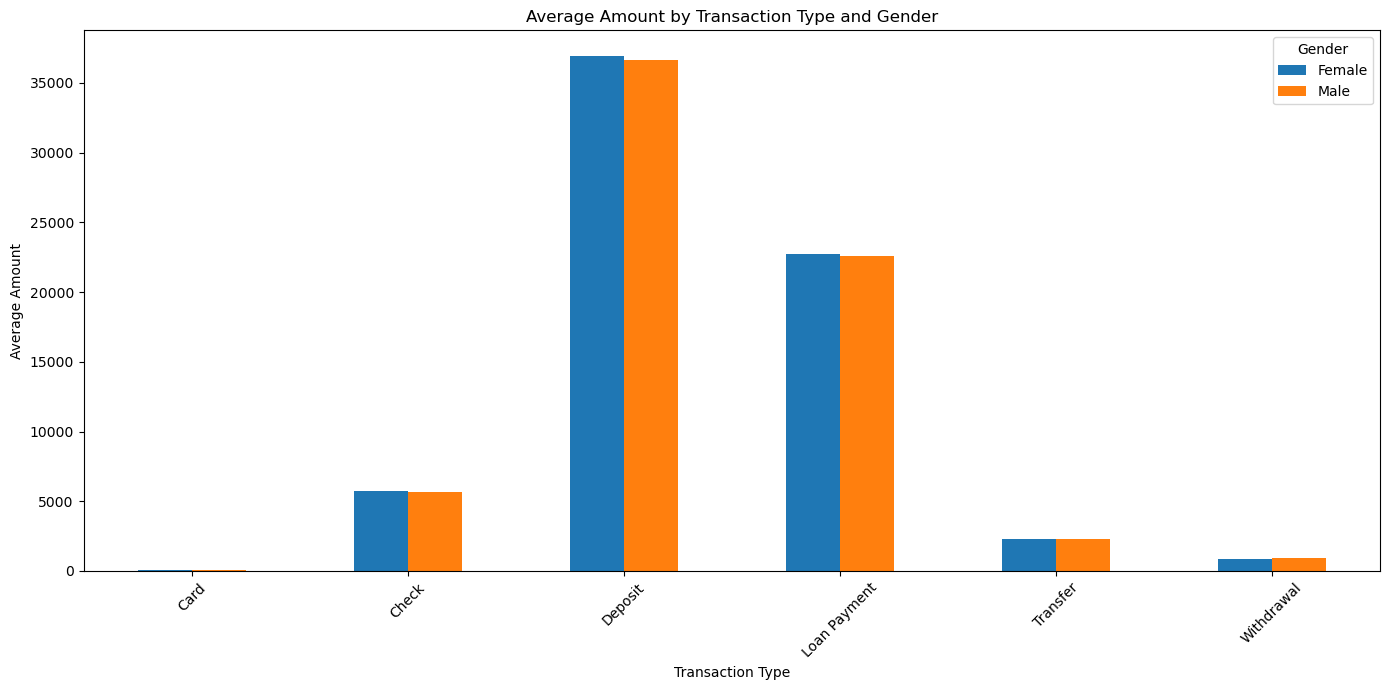

In [32]:
# Calculate the average amount for each Transaction_Type and Age_Group
average_amount = df.groupby(['Transaction_Type', 'Gender'])['Amount'].mean().unstack()

average_amount.plot(kind='bar', figsize=(14, 7))
plt.title('Average Amount by Transaction Type and Gender')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The above plot is a clustered bar chart .Key Obervations:
1. The deposit and loan payments are where most of the money transactions happen .
2. Female and men both transact money in the same way across all types, on average.With female being slightly higher than men(negligible)


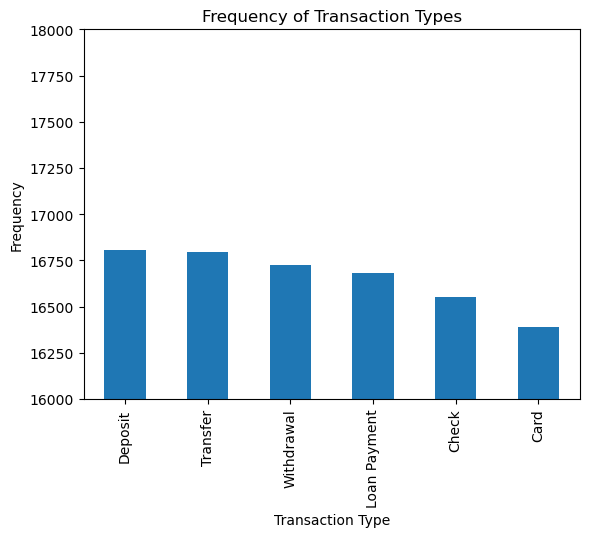

In [33]:
# Frequency plot
df['Transaction_Type'].value_counts().plot(kind='bar')
plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.ylim(16000,18000)
plt.show()



Key Findings:
1. The frequency of transaction types is almost the same across all other formats


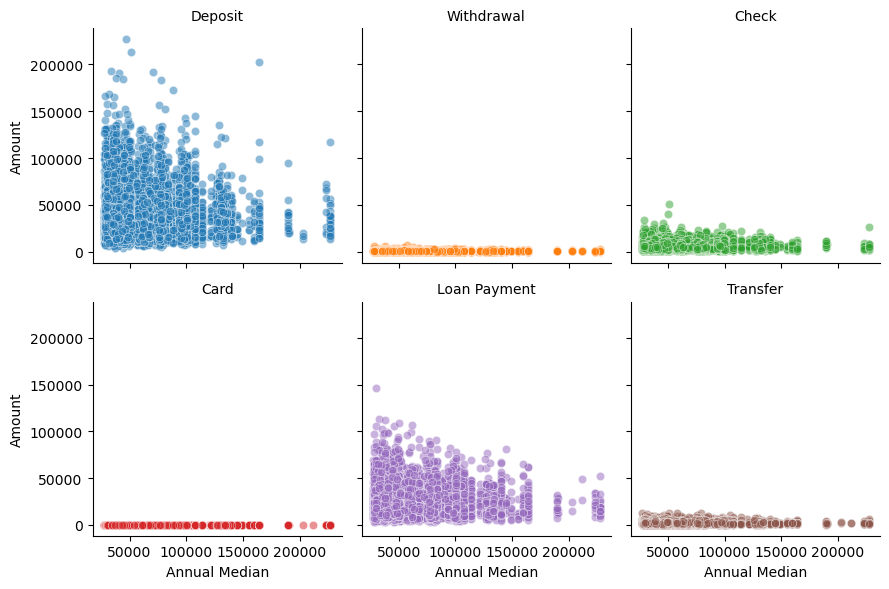

In [34]:
#### Influence of Annual Wage on transactions

g = sns.FacetGrid(df, col='Transaction_Type', hue='Transaction_Type', col_wrap=3)
g.map(sns.scatterplot, 'Annual_Median', 'Amount',alpha=0.5)

# Set titles and labels for subplots
g.set_titles("{col_name}")
g.set_axis_labels('Annual Median', 'Amount')

# Show the plot
plt.show()

The annual median salary can be split as follow:
people with annual median salary 
1. 0<annual median salary<80000 - Level1
2. 80000<annual median salary<160000 - Level2
3. 160000<annual median salary<240000 - Level3

From the above plot here are the key findings:
1. Very less money transactions happening through Withdrawal and Card.
2. In deposit and Loan Payment type people who fall in Level3 category are transacting lesser amount as compared to Level1 



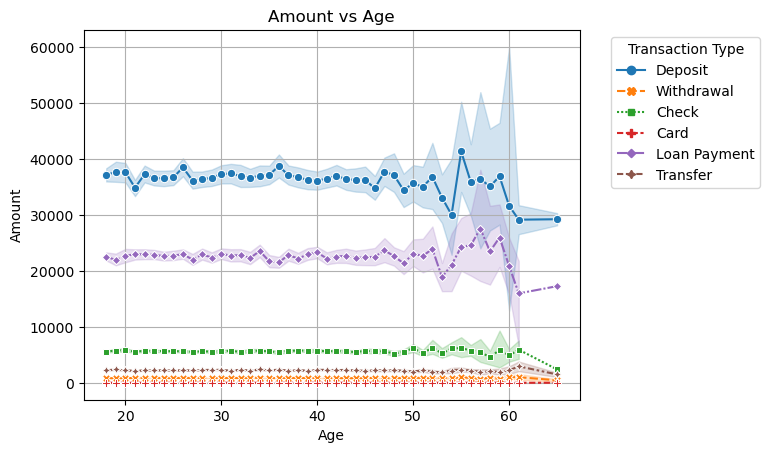

In [35]:
# Influence of age on transactions
sns.lineplot(data=df, x='Age', y='Amount', hue='Transaction_Type', style='Transaction_Type', markers=True)
plt.title('Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The above plot is a line chart describing the relation betwen age and average amount transaction with different transaction types
1. All transactions follow a similar pattern, with not much deviation in transaction amounts by age.

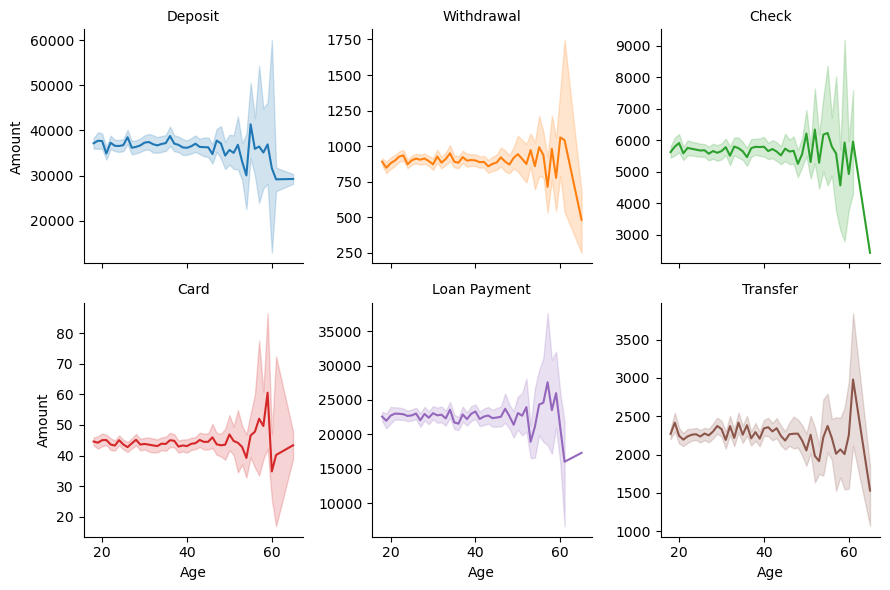

In [36]:
#### Freeing the axis and more detailed dive through 

g = sns.FacetGrid(df, col='Transaction_Type', hue='Transaction_Type', col_wrap=3,sharey=False)
g.map(sns.lineplot, 'Age', 'Amount')
g.set_titles("{col_name}")
g.set_axis_labels('Age', 'Amount')
plt.show()

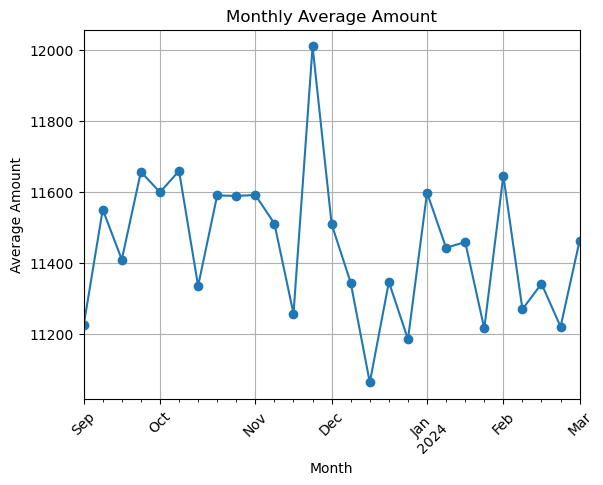

In [37]:
# Extracting week column from the Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Week'] = df['Timestamp'].dt.to_period('W')
weekly_avg = df.groupby('Week')['Amount'].mean()


weekly_avg.plot(marker='o', linestyle='-')
plt.title('Monthly Average Amount')
plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

Key Findings:
1. The transactions peaked right before the start of december 2023.
2. The data is stationary . No patterns observed . It could be used for time forecasting models. Given more data to us.

In [91]:
##################################################################################################################

## Please refer to the clustering_analysis.ipynb for detailed clustering analysis method